<a href="https://www.kaggle.com/code/reypow/fruit-classification-using-cnn?scriptVersionId=152224381" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-classification10-class/MY_data/predict/0124.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/023.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/365.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/659.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/img_241.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/22.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/9.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/011.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/0.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/img_171.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/img_31.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/img_361.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/img_41.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/img_21.jpeg
/kaggle/input/fruit-classificat

# Imports

Install keras preprocessing

In [2]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00


Import library yang dibutuhkan

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
from keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras import Sequential
from tensorflow.keras.optimizers import RMSprop
import glob as gb

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Preprocessing Data

Menetapkan jalur direktori untuk data latih (trainpath), data uji (testpath), dan data yang akan diprediksi (predpath). Selanjutnya, kode mencetak panjang (jumlah karakter) dari masing-masing path.

In [4]:
trainpath = "../input/fruit-classification10-class/MY_data/train/"
testpath = "../input/fruit-classification10-class/MY_data/test/"
predpath = "../input/fruit-classification10-class/MY_data/predict/"

print(len(trainpath))
print(len(testpath))
print(len(predpath))

52
51
54


Kemudian kita akan mengecek training, testing, dan prediction datanya untuk setiap kelas

In [5]:
for folder in os.listdir(trainpath):
    files = gb.glob(pathname=str(trainpath+folder + "/*.jpeg"))
    print(f"for training data , found {len(files)} in folder {folder}")

for training data , found 230 in folder orange
for training data , found 230 in folder strawberries
for training data , found 230 in folder Apple
for training data , found 230 in folder pinenapple
for training data , found 230 in folder kiwi
for training data , found 230 in folder avocado
for training data , found 230 in folder Banana
for training data , found 230 in folder cherry
for training data , found 230 in folder watermelon
for training data , found 231 in folder mango


In [6]:
for folder in os.listdir(testpath):
    files = gb.glob(pathname=str(testpath+folder + "/*.jpeg"))
    print(f"for training data , found {len(files)} in folder {folder}")

for training data , found 97 in folder orange
for training data , found 103 in folder stawberries
for training data , found 89 in folder apple
for training data , found 105 in folder pinenapple
for training data , found 105 in folder kiwi
for training data , found 105 in folder avocado
for training data , found 106 in folder banana
for training data , found 105 in folder cherry
for training data , found 105 in folder watermelon
for training data , found 105 in folder mango


In [7]:
files = gb.glob(pathname=str(predpath+"/*.jpeg"))
print(len(files))

48


In [8]:
classes=sorted(os.listdir(trainpath))
",".join([f"{i}:{c}" for i,c in enumerate(classes)])

'0:Apple,1:Banana,2:avocado,3:cherry,4:kiwi,5:mango,6:orange,7:pinenapple,8:strawberries,9:watermelon'

kemudian masuk ke bagian dari pembuatan generator data untuk melatih, memvalidasi, dan menguji model klasifikasi menggunakan TensorFlow dan Keras. Proses ini melibatkan augmentasi data untuk data latih (melalui train_datagen) dan data uji (testing_datagen). Augmentasi data adalah teknik yang melibatkan variasi data pelatihan dengan melakukan transformasi seperti rotasi, pembelokan, dan zoom untuk meningkatkan variasi dan generalisasi model.

In [9]:
TRAINING_DIR = trainpath
TESTING_DIR = testpath

train_datagen = ImageDataGenerator(
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        validation_split=0.2
    )


testing_datagen = ImageDataGenerator(
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255
    )

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    classes=classes,
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical",
    subset="training"
)


validation_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    classes=classes,
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical",
    subset="validation"
)

testing_generator = train_datagen.flow_from_directory(
    TESTING_DIR,
    classes=list(map(lambda x:x.lower().replace("strawberries","stawberries"),classes)),
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical"
)



Found 1841 images belonging to 10 classes.
Found 460 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


Dengan menggunakan generator ini, data dapat diambil secara otomatis dalam batch-batch selama proses pelatihan dan evaluasi model. Augmentasi data pada data latih membantu meningkatkan kemampuan generalisasi model, dan normalisasi pada data uji memastikan data siap untuk diproses oleh model.

# CNN Classification

In [10]:
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
    #A good dose of augmentation so that training data is hard to memorize but not too much to make the learning difficult
    layers.RandomRotation(0.1,input_shape=(256,256,3)),
    layers.RandomZoom(0.1),
    layers.RandomFlip(),
    layers.GaussianNoise(0.03),
    
    #convolutional portion
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(4),
    layers.Conv2D(64, 3,  activation='relu'),
    layers.MaxPooling2D(4),
    layers.Conv2D(128, 4,  activation='relu'),
    layers.MaxPooling2D(4),
    layers.Flatten(),
    
    #Dense portion, with high dropout rate for a high regualization
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005), 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

# add callbacks for early stopping and lr reduction during training 
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]

In [11]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=150,
                    verbose=1,
                    callbacks=callback_list)

Epoch 1/150
29/29 [==============================] - 56s 1s/step - loss: 2.2960 - accuracy: 0.1228 - val_loss: 2.2250 - val_accuracy: 0.2130 - lr: 0.0010
Epoch 2/150
29/29 [==============================] - 37s 1s/step - loss: 2.1840 - accuracy: 0.1706 - val_loss: 1.9996 - val_accuracy: 0.2674 - lr: 0.0010
Epoch 3/150
29/29 [==============================] - 38s 1s/step - loss: 1.9384 - accuracy: 0.2634 - val_loss: 1.7544 - val_accuracy: 0.3783 - lr: 0.0010
Epoch 4/150
29/29 [==============================] - 37s 1s/step - loss: 1.8339 - accuracy: 0.2814 - val_loss: 1.7154 - val_accuracy: 0.3478 - lr: 0.0010
Epoch 5/150
29/29 [==============================] - 37s 1s/step - loss: 1.7595 - accuracy: 0.2928 - val_loss: 1.6486 - val_accuracy: 0.3565 - lr: 0.0010
Epoch 6/150
29/29 [==============================] - 37s 1s/step - loss: 1.7387 - accuracy: 0.2928 - val_loss: 1.5425 - val_accuracy: 0.4174 - lr: 0.0010
Epoch 7/150
29/29 [==============================] - 37s 1s/step - loss: 1.6

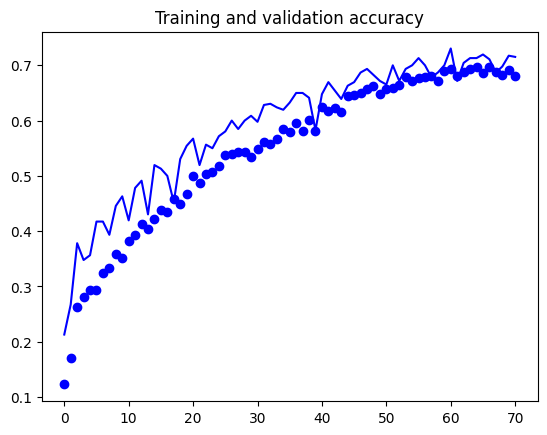

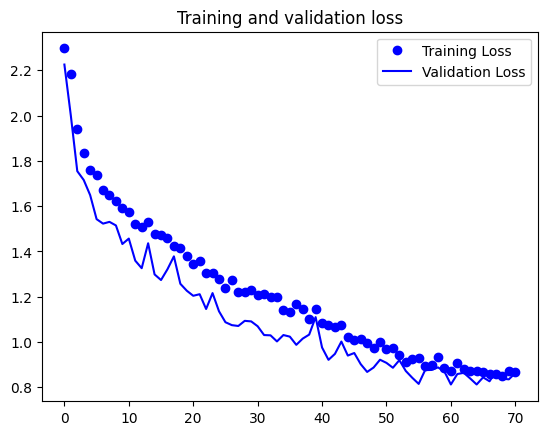

In [12]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Desired output. Charts with training and validation metrics. No crash :)

# Final evaluation on the test set

In [13]:
model.evaluate(testing_generator)

17/17 [==============================] - 20s 1s/step - loss: 1.0334 - accuracy: 0.6761


[1.0333805084228516, 0.676097571849823]

In [14]:
model.evaluate(validation_generator)

8/8 [==============================] - 7s 854ms/step - loss: 0.8190 - accuracy: 0.7261


[0.8189936876296997, 0.7260869741439819]